# PHYS 210 Lecture 17 - Nov 06, 2023
Agenda:

1. Announcements
1. Reading recap, polling questions and Q&A
1. Group Worksheet 17

## Heads up for Wed, Nov 08
* Solo worksheet from today
* Reading Assignment 18 due (File Input/Output)
* In-class group worksheet 17
* Homework 03 will be posted later this week

## Reading recap, polling questions and Q&A

### Recap of Markov Chain Monte Carlo and the Metropolis probability
Let's look at a slightly different system with energy levels than the one we encountered in the reading

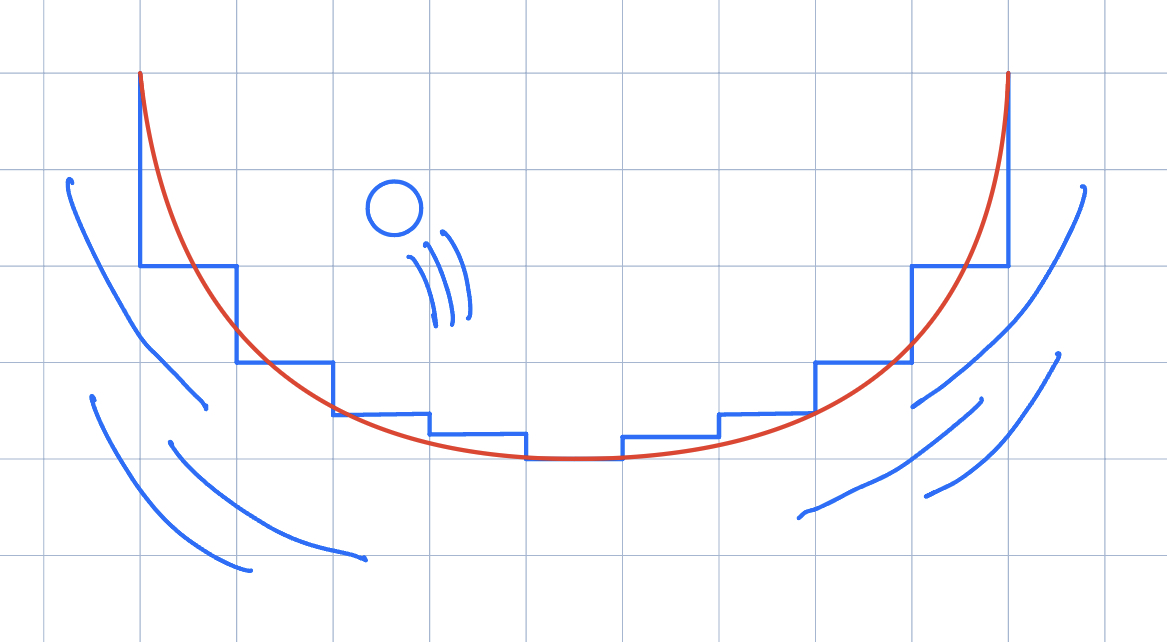

We are cooking popcorn in large ridged wok
* Approximated as being parabolic and having a structure with discrete x-positions and corresponding heights. 
* The wok is being agitated (shaken) with an external energy $kT$, such that the system is constantly imparting energy to the popcorn kernels
* The popcorn kernels will randomly move left or right. When trying to move up the steps, they won't always make it because they run into the side of the step first. When trying to move down the steps, they always make it.
* We use changes in gravitational potential energy to model how it becomes increasingly difficulty to move up the steps as the individual steps become taller and taller.

1. **Initialization**: Start with 100 popcorn kernels in the "ground state", at `x = 0`.
2. **Proposal**: Pick a kernel at random and propose that it moves to the left or right.
3. **Acceptance**: Accept the move according to the Metropolis probability based on the change in gravitational energy due to the proposal
4. **Iteration**: Iterate `Nsteps` times

**Polling Q17.1:** 
What are the conditions for the following?

1. p = 0<br>
1. 0 < p < 1<br>
1. p = 1<br>
1.  p > 1<br>

In [ ]:
dE = xf**2 - xi**2
p = np.exp(-dE / kT) # 1.

# 1. very big dE
# 2. xf>xi
# 3. xi=xf
# 4. xi>xf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the change in potential energy
def delta_potential_energy(xi, xf):
    
    # parabpolic so h ~ x^2
    # set m = g = 1, so E = h = x^2
    return xf**2 - xi**2


# Initialize the system
Nsteps = 5000
Nkernels = 100

kT = 1.

# Store the initial positions of all kernels
x = np.zeros(Nkernels)

# Store the evolution of the system over time
x_ave = np.zeros(Nsteps)
x_std = np.zeros(Nsteps)

for t in range(Nsteps):
    
    # Choose which kernel will have the proposed move
    kernel = np.random.randint(Nkernels)
    
    # Choose the proposed move
    dx = np.random.choice([-1, 1])    
    
    # Calculate the change in potential energy (xi, xf)
    dE = delta_potential_energy( x[kernel] , x[kernel]+dx )

    # Acceptance probability 
    p = np.exp(-dE / kT)

    # Accept or reject the move
    if np.random.rand() < p:
        x[kernel] += dx
        
    x_ave[t] = x.mean()
    x_std[t] = x.std(ddof=1)
    
# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histogram of final positions
axs[0].hist(x, bins=np.linspace(-8,9, 17))
axs[0].set_title(f'Histogram of popcorn kernels after {Nsteps} steps')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Number of Particles')

# Plot of mean and standard deviation over time
axs[1].plot(x_ave, label='Mean Position')
axs[1].plot(x_std, label='Position STD')
axs[1].set_title('Mean and Standard Deviation of Particle Positions Over Time')
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Position')
axs[1].legend()

plt.tight_layout() 
plt.show()